In [1]:
#import dependencies
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy.sql import func, text
from datetime import datetime,timedelta,date
import matplotlib.pyplot as plt
import numpy as np


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [6]:
# save the class as a variable
Measurement = Base.classes.measurement
Station = Base.classes.station
# Create a session
session = Session(engine)

# Precipitation Analysis

In [7]:
# recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# startdate=recent_date[0]
# dt = datetime.strptime(startdate,'%Y-%m-%d')
# enddate=dt.replace(year = (dt.year - 1))
# enddate

filterdate = datetime.now() - timedelta(days=365)

In [8]:
station = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=filterdate).all()
station.count

<function list.count>

In [9]:
df = pd.DataFrame(station)

In [10]:
df.plot(x=df["date"], kind="bar", figsize=(20, 12), title="Pricipitation Analysis for 12 months")
plt.xlabel("Date")
plt.ylabel("Percipitation")


In [11]:
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])

[]

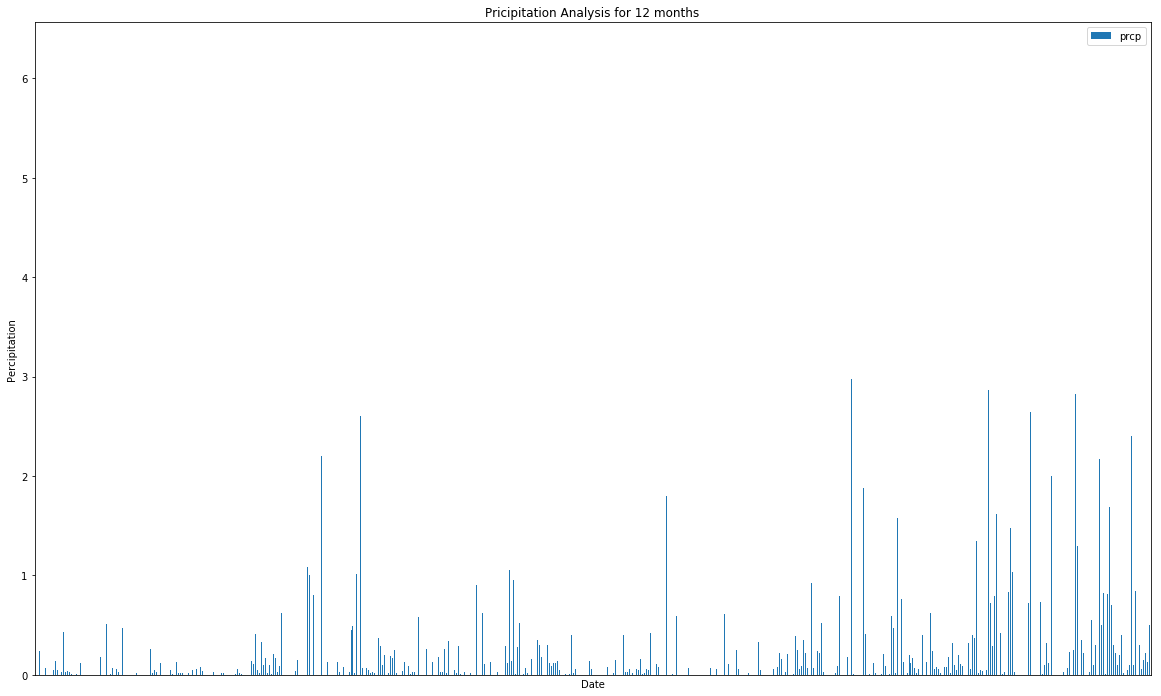

In [12]:
plt.show()

# Station Analysis

In [13]:
# Design a query to calculate the total number of stations

station_count = session.query(Station).count()
print("The number of the Station are :%s" %(station_count))

The number of the Station are :9


In [14]:
# Design a query to find the most active stations.
station_obs=session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).all()
station_obs

[('USC00511918', 1932),
 ('USC00513117', 2696),
 ('USC00514830', 1937),
 ('USC00516128', 2484),
 ('USC00517948', 683),
 ('USC00518838', 342),
 ('USC00519281', 2772),
 ('USC00519397', 2685),
 ('USC00519523', 2572)]

In [15]:
# convert the result in the dataframe
df1 = pd.DataFrame([x for x in station_obs], columns=["Station","No of obs"])

In [16]:
# List the stations and observation counts in descending order

df1=df1.sort_index(by=['No of obs'], ascending=[False])
df1

/Users/sumana/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Station,No of obs
6,USC00519281,2772
1,USC00513117,2696
7,USC00519397,2685
8,USC00519523,2572
3,USC00516128,2484
2,USC00514830,1937
0,USC00511918,1932
4,USC00517948,683
5,USC00518838,342


In [17]:
# Which station has the highest number of observations?

print("%s station has the highest number of observations" %(df1["Station"].iloc[0]))

USC00519281 station has the highest number of observations


In [18]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).

temperature = session.query(Measurement.station,Measurement.tobs,Measurement.date).filter(Measurement.date>=filterdate).all()
df2=pd.DataFrame(temperature)
df2.head()

,station,tobs,date
0,USC00519397,78,2016-10-23
1,USC00519397,77,2016-10-24
2,USC00519397,77,2016-10-25
3,USC00519397,78,2016-10-26
4,USC00519397,77,2016-10-27


In [19]:
# Filter by the station with the highest number of observations.

temperature_grp = session.query(Measurement.station,func.count(Measurement.tobs)).filter(Measurement.date>=filterdate).group_by(Measurement.station).all()

In [20]:
df3=pd.DataFrame([x for x in temperature_grp], columns=["Station","No of obs"])

In [21]:
df3=df3.sort_index(by=['No of obs'], ascending=[False])
df3

/Users/sumana/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


,Station,No of obs
5,USC00519397,300
4,USC00519281,291
0,USC00513117,282
2,USC00516128,269
6,USC00519523,257
1,USC00514830,221
3,USC00517948,50


In [22]:
print("%s station has the highest number of temp for last 12 months" %(df3["Station"].iloc[0]))

USC00519397 station has the highest number of temp for last 12 months


In [23]:
# Plot the results as a histogram with bins=12.

plt.hist(df2["tobs"], bins=12)

(array([  10.,   17.,   64.,   75.,  232.,  222.,  234.,  436.,  205.,
         161.,   13.,    1.]),
 array([ 58.        ,  60.41666667,  62.83333333,  65.25      ,
         67.66666667,  70.08333333,  72.5       ,  74.91666667,
         77.33333333,  79.75      ,  82.16666667,  84.58333333,  87.        ]),
 <a list of 12 Patch objects>)

In [24]:
plt.legend()

/Users/sumana/anaconda/envs/PythonData/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


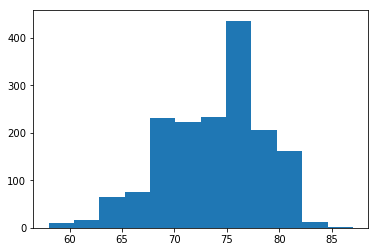

In [25]:
plt.show()

# Temperature Analysis

In [26]:
# Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates

def Calc_temps(a,b):
    
    obs_temp = session.query(Measurement.tobs).filter(Measurement.date<=b).filter(Measurement.date>=a).all()
    a=max(obs_temp)
    b=min(obs_temp)
    c=np.mean(obs_temp)
    var={"max":a,"min":b,"avg":c}
#     print("The Max temp %s"%(a))
#     print("The Min temp %s"%(b))
#     print("The Avg temp %s"%(c))
    return var
    
startdate=input("Enter the start date in (format yyyy-mm-dd) : ")
dt_start = datetime.strptime(startdate, '%Y-%m-%d')
enddate=input("Enter the end date : (format yyyy-mm-dd) ")
dt_end = datetime.strptime(enddate, '%Y-%m-%d')
    
temp_def=Calc_temps(dt_start,dt_end)

print("The Max temp %s"%(temp_def["max"]))
print("The Min temp %s"%(temp_def["min"]))
print("The Avg temp %s"%(temp_def["avg"]))
    

Enter the start date in (format yyyy-mm-dd) : 2017-1-3
Enter the end date : (format yyyy-mm-dd) 2017-4-5
The Max temp 82
The Min temp 59
The Avg temp 70.8146718147


In [27]:
# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year 

trip_start=input("Enter the Trip start date in (format yyyy-mm-dd) : ")
dt1 = datetime.strptime(trip_start, '%Y-%m-%d')
dt1_s=dt1.replace(year =(dt1.year - 1))

trip_end=input("Enter the Trip end date in (format yyyy-mm-dd) : ")
dt2 = datetime.strptime(trip_end, '%Y-%m-%d')
dt2_e=dt2.replace(year = (dt2.year - 1))

items=Calc_temps(dt1_s,dt2_e)

print("The temp analysis for trip duration from %s to %s from previous year is as below :" %(trip_start,trip_end))
print("The Max temp %s "%(items["max"]))
print("The Min temp %s"%(items["min"]))
print("The Avg temp %s"%(items["avg"]))

Enter the Trip start date in (format yyyy-mm-dd) : 2016-2-5
Enter the Trip end date in (format yyyy-mm-dd) : 2016-4-6
The temp analysis for trip duration from 2016-2-5 to 2016-4-6 from previous year is as below :
The Max temp 80 
The Min temp 56
The Avg temp 69.5369863014


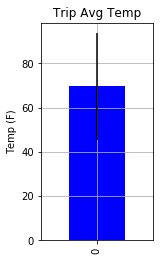

In [28]:
average=pd.Series(items["avg"])
Max=pd.Series(items["max"])
Min=pd.Series(items["min"])
x=1
stdsum=Max-Min

average.plot(kind='bar',color="blue",yerr=stdsum,width=.5,figsize=(2,4),title="Trip Avg Temp",grid=True)
plt.ylabel('Temp (F)')
plt.show()

# Optional Recommended Analysis

In [29]:
# Calcualte the rainfall per weather station using the previous year's matching dates.

filterdate = datetime.now() - timedelta(days=365)
obs_prcp = session.query(Measurement.station,Measurement.prcp).filter(Measurement.date>=filterdate).all()

In [30]:
#convert the result in dataframe

df_rain=pd.DataFrame([x for x in obs_prcp], columns=["Station","Rainfall"])
df_rain.head()

,Station,Rainfall
0,USC00519397,0.01
1,USC00519397,0.00
2,USC00519397,0.03
3,USC00519397,0.00
4,USC00519397,0.00


In [31]:
# Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.


def Daily_normal(eval_date):
    
    normal_temp={}
   
    time_month=eval_date.month
    time_day=eval_date.day

    normal_max = session.query(func.max(Measurement.tobs)).filter(func.extract('day',Measurement.date) == time_day).filter(func.extract('month',Measurement.date) == time_month).first()
    normal_avg = session.query(func.avg(Measurement.tobs)).filter(func.extract('day',Measurement.date) == time_day).filter(func.extract('month',Measurement.date) == time_month).first()
    normal_min = session.query(func.min(Measurement.tobs)).filter(func.extract('day',Measurement.date) == time_day).filter(func.extract('month',Measurement.date) == time_month).first()
    
    normal_temp["Date"]=eval_date
    normal_temp["Max Temp"]=normal_max[0]
    normal_temp["Min Temp"]=normal_min[0]
    normal_temp["Avg Temp"]=normal_avg[0]
    
    return normal_temp


In [32]:
start_trip=input("Enter the date- yyyy-mm-dd- ")
trip_start =datetime.strptime(start_trip, "%Y-%m-%d")

end_trip=input("Enter the date- yyyy-mm-dd- ")
trip_end =datetime.strptime(end_trip, "%Y-%m-%d")

temp_list=[]

trip_session=session.query(Measurement.date).filter(Measurement.date>=trip_start).filter(Measurement.date<=trip_end).all()
    
for dates in trip_session:
    #print('date=',dates.date,'type=',type(dates.date))
    d = datetime.strptime(dates.date,"%Y-%m-%d")
    #print('date1=',d,'type1=',type(d))
    nt_dict = Daily_normal(d)
#     print('normal temp=',nt_dict)
    temp_list.append(nt_dict)


Enter the date- yyyy-mm-dd- 2017-1-6
Enter the date- yyyy-mm-dd- 2017-4-7


In [33]:
#convert the data into dataframe

normaltemp=pd.DataFrame(temp_list)
normaltemp.head()

,Avg Temp,Date,Max Temp,Min Temp
0,68.381818,2017-01-07,76,57
1,67.200000,2017-01-08,75,57
2,68.072727,2017-01-09,78,58
3,69.811321,2017-01-10,77,62
4,67.078431,2017-01-11,78,57


In [34]:
normaltemp=normaltemp.set_index(['Date'])
normaltemp

,Avg Temp,Max Temp,Min Temp
Date,,,
2017-01-07,68.381818,76,57
2017-01-08,67.200000,75,57
2017-01-09,68.072727,78,58
2017-01-10,69.811321,77,62
2017-01-11,67.078431,78,57
2017-01-12,67.120000,80,57
2017-01-13,66.680851,77,57
2017-01-14,69.425926,77,58
2017-01-15,68.958333,76,56


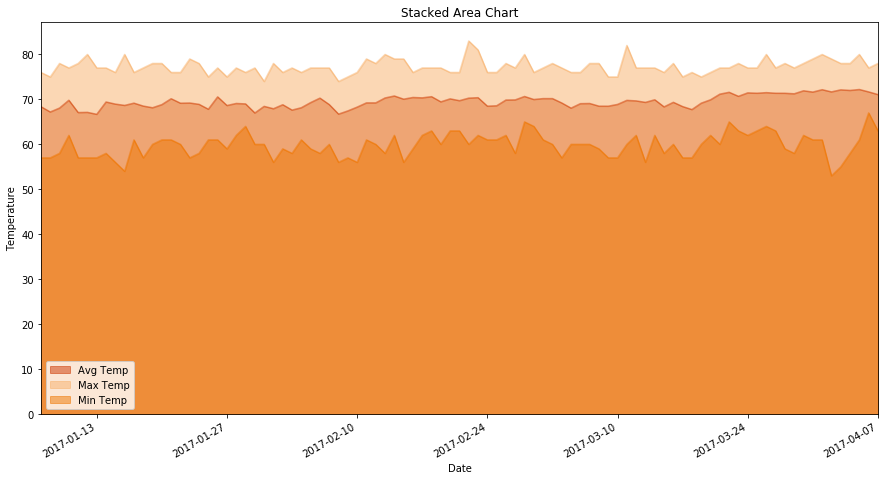

In [35]:
#plot the area plot

ax = normaltemp.plot(kind='area', stacked=False, title='Stacked Area Chart',color=['#CD3700','#f8b16b','#EE7600'],figsize=(15,8))
ax.set_ylabel('Temperature')
ax.margins(0, 0) # Set margins to avoid "whitespace"
plt.show()